In [3]:
import os
import sys
os.chdir(sys.path[0])
os.getcwd() 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
df = pd.read_csv('Final_oversampled.csv')
df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic Pressure,Diastolic Pressure,Sleep Disorder
0,1,-1.753096,9,-1.298887,-1.098280,-0.825418,0.347021,3,1.654719,-1.619584,-0.330002,-0.268102,1
1,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,-0.459239,-0.755640,1
2,1,-1.637643,1,-1.173036,-1.098280,0.039844,1.475592,0,1.170474,1.970077,-0.459239,-0.755640,1
3,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,1.479309,0.869486,2
4,1,-1.637643,6,-1.550588,-2.771424,-1.402260,1.475592,2,3.591698,-2.362273,1.479309,0.869486,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0.902324,5,-1.424738,-1.098280,1.481948,1.475592,3,1.170474,1.970077,1.479309,1.682049,2
653,0,1.825948,5,1.092276,1.411435,0.760896,-1.345836,3,-0.524383,0.113356,1.479309,1.682049,2
654,0,1.479589,5,1.218127,1.411435,0.760896,-0.781551,3,0.444107,-1.124458,1.479309,1.682049,2
655,1,0.094153,7,-0.795484,-1.098280,-0.681208,0.911306,3,0.444107,-0.505551,0.186944,0.056923,2


In [5]:
X = df.drop('Sleep Disorder', axis=1)
y = df['Sleep Disorder']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Bayes

In [9]:
GNB = GaussianNB()

GNB.fit(X_train, y_train)

GaussianNB()

In [10]:
print(classification_report(y_train, GNB.predict(X_train)))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87       190
           1       0.86      0.91      0.88       167
           2       0.93      0.86      0.90       168

    accuracy                           0.88       525
   macro avg       0.89      0.88      0.88       525
weighted avg       0.89      0.88      0.88       525



In [11]:
print(classification_report(y_test, GNB.predict(X_test)))

              precision    recall  f1-score   support

           0       0.74      0.90      0.81        29
           1       0.87      0.92      0.90        52
           2       1.00      0.82      0.90        51

    accuracy                           0.88       132
   macro avg       0.87      0.88      0.87       132
weighted avg       0.89      0.88      0.88       132



In [40]:
import pickle

pickle.dump(GNB, open('gnbmodel.pkl', 'wb'))

## Decision Tree

### GINI

In [13]:
dtcG = DecisionTreeClassifier(random_state=42)

dtcG.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
print(classification_report(y_train, dtcG.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       190
           1       0.95      0.88      0.91       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [15]:
print(classification_report(y_test, dtcG.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.93      0.81      0.87        52
           2       0.96      0.90      0.93        51

    accuracy                           0.87       132
   macro avg       0.86      0.88      0.86       132
weighted avg       0.89      0.87      0.87       132



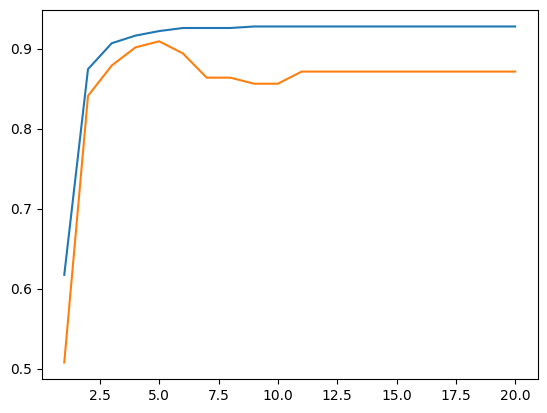

In [16]:
acc_train = []
acc_test = []

for i in range(1, 21):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i, criterion='gini')
    dtc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, dtc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, dtc.predict(X_test)))

plt.plot(range(1, 21), acc_train, label='Train Accuracy')
plt.plot(range(1, 21), acc_test, label='Test Accuracy')

In [17]:
# Get the best depth
best_depth = acc_test.index(max(acc_test)) + 1
best_depth

5

In [18]:
acc_train.index(max(acc_train)) + 1

9

In [45]:
dtcG5 = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='gini')

dtcG5.fit(X_train, y_train)

print(classification_report(y_train, dtcG5.predict(X_train)))

print(classification_report(y_test, dtcG5.predict(X_test)))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       190
           1       0.86      0.96      0.91       167
           2       0.95      0.92      0.93       168

    accuracy                           0.92       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.93      0.92      0.92       525

              precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.88      0.96      0.92        52
           2       0.96      0.90      0.93        51

    accuracy                           0.91       132
   macro avg       0.91      0.90      0.90       132
weighted avg       0.91      0.91      0.91       132



[Text(0.6620370370370371, 0.9166666666666666, 'Systolic Pressure <= 1.092\ngini = 0.665\nsamples = 525\nvalue = [190, 167, 168]'), Text(0.39814814814814814, 0.75, 'BMI Category <= 2.5\ngini = 0.56\nsamples = 368\nvalue = [181, 162, 25]'), Text(0.24074074074074073, 0.5833333333333334, 'Diastolic Pressure <= 0.138\ngini = 0.339\nsamples = 190\nvalue = [23, 152, 15]'), Text(0.14814814814814814, 0.4166666666666667, 'Systolic Pressure <= 0.058\ngini = 0.251\nsamples = 177\nvalue = [17, 152, 8]'), Text(0.07407407407407407, 0.25, 'Occupation <= 9.5\ngini = 0.166\nsamples = 124\nvalue = [6, 113, 5]'), Text(0.037037037037037035, 0.08333333333333333, 'gini = 0.129\nsamples = 117\nvalue = [6, 109, 2]'), Text(0.1111111111111111, 0.08333333333333333, 'gini = 0.49\nsamples = 7\nvalue = [0, 4, 3]'), Text(0.2222222222222222, 0.25, 'Age <= 0.036\ngini = 0.412\nsamples = 53\nvalue = [11, 39, 3]'), Text(0.18518518518518517, 0.08333333333333333, 'gini = 0.297\nsamples = 35\nvalue = [4, 29, 2]'), Text(0.25

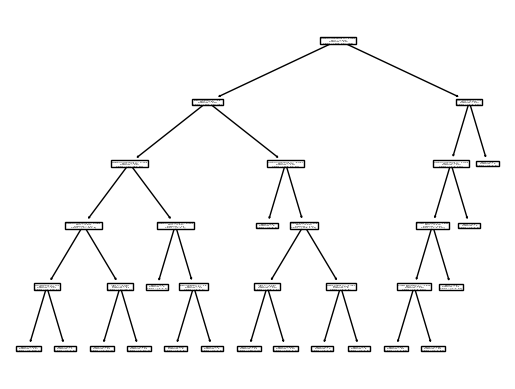

In [58]:
# print the tree

from sklearn.tree import plot_tree
print(plot_tree(dtcG5, feature_names=X.columns))

In [46]:
pickle.dump(dtcG5, open('dtcG5model.pkl', 'wb'))

### Entropy

In [19]:
dtcE = DecisionTreeClassifier(random_state=42, criterion='entropy')
dtcE.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [20]:
print(classification_report(y_train, dtcE.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       190
           1       0.95      0.88      0.91       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [21]:
print(classification_report(y_test, dtcE.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.93      0.81      0.87        52
           2       0.96      0.90      0.93        51

    accuracy                           0.87       132
   macro avg       0.86      0.88      0.86       132
weighted avg       0.89      0.87      0.87       132



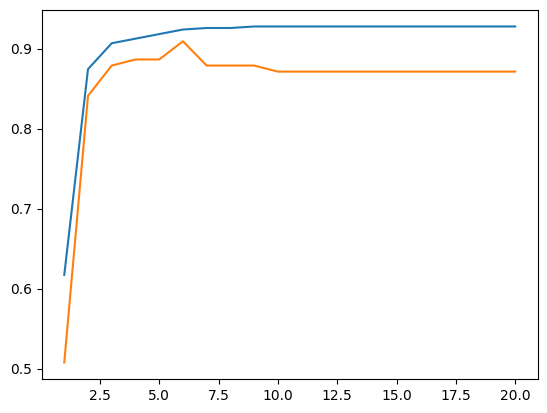

In [22]:
acc_train = []
acc_test = []

for i in range(1, 21):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i, criterion='entropy')
    dtc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, dtc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, dtc.predict(X_test)))

plt.plot(range(1, 21), acc_train, label='Train Accuracy')
plt.plot(range(1, 21), acc_test, label='Test Accuracy')

In [23]:
# Get the best depth
best_depth = acc_test.index(max(acc_test)) + 1
best_depth

6

In [24]:
acc_train.index(max(acc_train)) + 1

9

### Log Loss

In [25]:
dtcL = DecisionTreeClassifier(random_state=42, criterion='log_loss')
dtcL.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', random_state=42)

In [26]:
print(classification_report(y_train, dtcL.predict(X_train)))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93       190
           1       0.95      0.88      0.91       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [27]:
print(classification_report(y_test, dtcL.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.93      0.79        29
           1       0.93      0.81      0.87        52
           2       0.96      0.90      0.93        51

    accuracy                           0.87       132
   macro avg       0.86      0.88      0.86       132
weighted avg       0.89      0.87      0.87       132



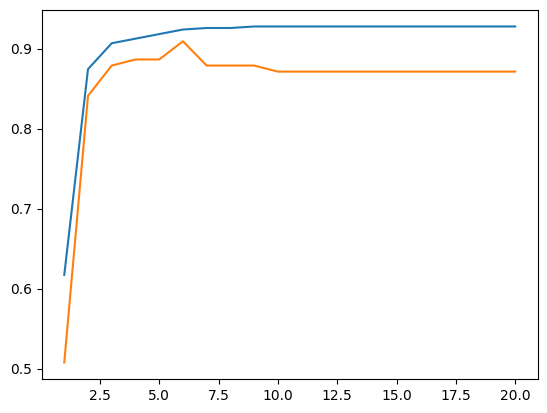

In [28]:
acc_train = []
acc_test = []

for i in range(1, 21):
    dtc = DecisionTreeClassifier(random_state=42, max_depth=i, criterion='log_loss')
    dtc.fit(X_train, y_train)
    acc_train.append(accuracy_score(y_train, dtc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, dtc.predict(X_test)))

plt.plot(range(1, 21), acc_train, label='Train Accuracy')
plt.plot(range(1, 21), acc_test, label='Test Accuracy')

In [29]:
# Get the best depth
best_depth = acc_test.index(max(acc_test)) + 1
best_depth

6

In [30]:
acc_train.index(max(acc_train)) + 1

9

# AdaBoost

In [31]:
from sklearn.ensemble import AdaBoostClassifier

In [32]:
abc = AdaBoostClassifier(base_estimator=dtcG, random_state=42)

In [33]:
abc.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                   random_state=42)

In [34]:
print(classification_report(y_train, abc.predict(X_train)))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       190
           1       0.93      0.90      0.92       167
           2       0.93      0.94      0.94       168

    accuracy                           0.93       525
   macro avg       0.93      0.93      0.93       525
weighted avg       0.93      0.93      0.93       525



In [35]:
print(classification_report(y_test, abc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.73      0.83      0.77        29
           1       0.90      0.87      0.88        52
           2       0.94      0.90      0.92        51

    accuracy                           0.87       132
   macro avg       0.86      0.86      0.86       132
weighted avg       0.88      0.87      0.87       132



In [52]:
acc_train = []
acc_test = []
for i in range(50, 500, 25):
    abc = AdaBoostClassifier(base_estimator=dtcG5, n_estimators=i, random_state=42)
    abc.fit(X_train, y_train)
    print(f'Accuracy for {i} estimators: {accuracy_score(y_test, abc.predict(X_test))}')
    acc_train.append(accuracy_score(y_train, abc.predict(X_train)))
    acc_test.append(accuracy_score(y_test, abc.predict(X_test)))


Accuracy for 50 estimators: 0.8939393939393939
Accuracy for 75 estimators: 0.8939393939393939
Accuracy for 100 estimators: 0.8939393939393939
Accuracy for 125 estimators: 0.8939393939393939
Accuracy for 150 estimators: 0.8939393939393939
Accuracy for 175 estimators: 0.8939393939393939
Accuracy for 200 estimators: 0.8939393939393939
Accuracy for 225 estimators: 0.8939393939393939
Accuracy for 250 estimators: 0.8939393939393939
Accuracy for 275 estimators: 0.8939393939393939
Accuracy for 300 estimators: 0.8939393939393939
Accuracy for 325 estimators: 0.8939393939393939
Accuracy for 350 estimators: 0.8939393939393939
Accuracy for 375 estimators: 0.8939393939393939
Accuracy for 400 estimators: 0.8939393939393939
Accuracy for 425 estimators: 0.8939393939393939
Accuracy for 450 estimators: 0.8939393939393939
Accuracy for 475 estimators: 0.8939393939393939


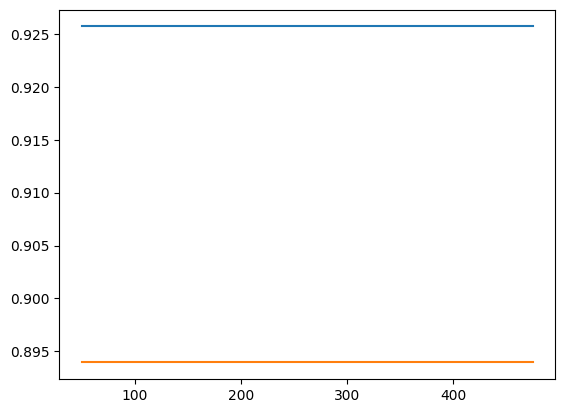

In [55]:
plt.plot(range(50, 500, 25), acc_train, label='Train Accuracy')
plt.plot(range(50, 500, 25), acc_test, label='Test Accuracy')

In [50]:
acc_train.index(max(acc_train)) + 1, acc_test.index(max(acc_test)) + 1

(1, 1)

In [56]:
pickle.dump(abc, open('abcmodel.pkl', 'wb'))